# 샘플 자기상관계수 함수

## 샘플 자기상관계수 함수의 정의

자기상관계수 함수(ACF: autocorrelation function) $\rho_k$는 정상 확률 과정을 표현할 수 있는 가장 대표적인 특성이다. 그러나 자기상관계수 함수 $\rho(k)$의 정확한 값을 알기 위해서는 해당 정상 확률 과정에 대한 수학적인 모형을 알고 있어야 한다. 만약 수학적 모형이 없고 시계열 자료 즉, 확률 과정의 샘플만 존재하는 경우에는 이로부터 **샘플 자기상관계수 함수(Sample ACF)**를 구하여 이론적인 자기상관계수 함수의 형태를 유추해야 한다.

시계열 자료 $\{y_t; t=1, \cdots, n\}$가 존재하는 경우 샘플 자기상관계수 함수 $r_k$는 샘플 자기공분산 함수 $\hat{\gamma}_k$의 비(ratio)로 정의한다.


$$ \hat{\gamma}_k  = \dfrac{1}{n} \sum_{t=k+1}^n (y_t - \bar{y})(y_{t-k} - \bar{y}) $$


$$ \hat{r}_k = \dfrac{\hat{\gamma}_k}{\hat{\gamma}_0} = \dfrac{\sum_{t=k+1}^n (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^n (y_t - \bar{y})^2} $$

일반적으로는 샘플 자기공분산 함수의 정의에서 분모를 $n-k$가 아닌 $n$를 사용한다. 이렇게 편향 오차가 있는 추정값을 사용하는 것은 자기공분산 행렬을 양한정(positive definite)으로 만들기 위한 것이다

## Python 에서 샘플 자기상관계수 함수 계산

statsmodels에서 샘플 자기공분산 함수 혹은 샘플 자기상관계수 함수를 구하려면 [`acovf`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.acovf.html#statsmodels.tsa.stattools.acovf) 혹은 [`acf`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf) 함수를 사용한다.

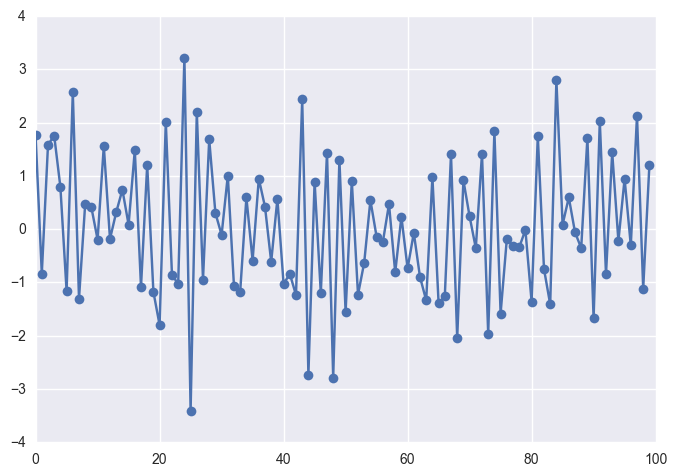

In [1]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [1, -0.7, 0.5])
y = p.generate_sample(100)
plt.plot(y, 'o-')
plt.show()

In [2]:
acf = sm.tsa.acf(y) 
acf
## tsa: time series analysis 시계열 분석
## acf : auto correlation factor 자기 상관계수 함수 = 차수에 따라 자기상관계수를 보여줌 

array([ 1.        , -0.58739105,  0.35031803,  0.00498482, -0.01397113,
        0.07163358, -0.01802841,  0.01584547,  0.17669837, -0.22766943,
        0.28222138, -0.17787336,  0.1306332 ,  0.09547339, -0.14429412,
        0.2576279 , -0.16731472,  0.05391657,  0.01602894, -0.02425665,
       -0.02014025,  0.05931565, -0.04295451,  0.04077237, -0.10082598,
        0.17204025, -0.15233124,  0.09468713,  0.00224732, -0.04900103,
        0.0014167 ,  0.00761237, -0.10039879,  0.08961654, -0.11113657,
        0.04220667, -0.03688234, -0.06425659,  0.01498291, -0.07551366,
       -0.01346472])

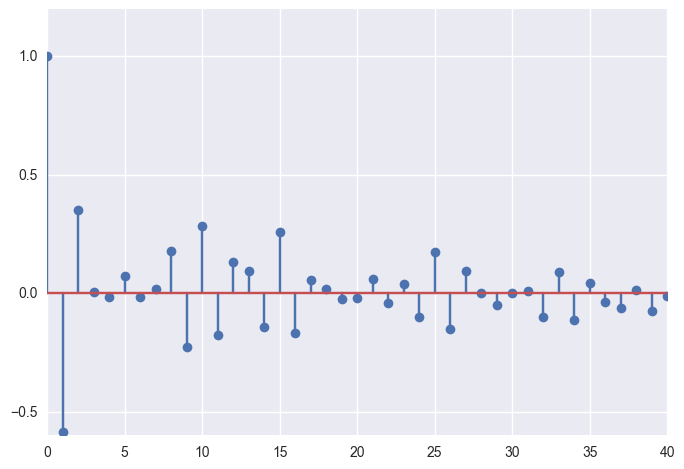

In [3]:
plt.stem(acf)
plt.show()
# 자기상관계수를 0을 기준으로 다시 보여줌 

## 샘플 자기상관계수 함수의 분포 특성

샘플 자기상관계수 함수의 값은 계산에 사용된 시계열 값 즉, 샘플에 의존하기 때문에 마찬가지로 확률 변수가 된다. 샘플 자기상관계수 함수의 분포 특성은 다음과 같다.

* 샘플 시계열의 길이 $n$이 크면,

  * 샘플 자기상관계수의 분포는 정규분포와 비슷해진다.
  
  * 샘플 자기상관계수 $r_k$의 기댓값은 이론적인 자기상관계수 $\rho_k$이다
  
  * 샘플 자기상관계수 $r_k$의 분산은 $n$에 반비례 한다. 
  
  $$ \text{Var}[r_k] \sim \dfrac{1}{n} $$
  

만약 확률 과정이 가우시안 백색 잡음인 경우에는 샘플 자기상관계수는 기댓값 $\rho_k$와 분산 $1/n$을 가지는 정규분포가 된다.

$$ \text{Var}[r_k] \sim \mathcal{N}\left(\rho_k, \dfrac{1}{n}\right) $$

statsmodels의 acf 함수는 alpha 인수가 주어지는 경우, 이 값을 유의 수준(significance level)로 가지는 자기상관계수의 신뢰구간을 출력한다. 

In [7]:
acf, confint = sm.tsa.acf(y, alpha=0.05)
confint

array([[ 1.        ,  1.        ],
       [-0.78338745, -0.39139465],
       [ 0.09551846,  0.60511761],
       [-0.26768992,  0.27765955],
       [-0.28664936,  0.25870711],
       [-0.20107215,  0.34433932],
       [-0.29145602,  0.25539919],
       [-0.25762779,  0.28931874],
       [-0.09681016,  0.4502069 ],
       [-0.50552857,  0.0501897 ],
       [-0.00271373,  0.56715649],
       [-0.47335158,  0.11760485],
       [-0.1689301 ,  0.4301965 ],
       [-0.20627031,  0.3972171 ],
       [-0.44719604,  0.1586078 ],
       [-0.04790314,  0.56315894],
       [-0.48107981,  0.14645037],
       [-0.26325736,  0.37109051],
       [-0.30149688,  0.33355477],
       [-0.34181356,  0.29330025],
       [-0.33776833,  0.29748782],
       [-0.25836148,  0.37699278],
       [-0.3610568 ,  0.27514778],
       [-0.27755266,  0.3590974 ],
       [-0.41935156,  0.21769961],
       [-0.147709  ,  0.49178949],
       [-0.47561681,  0.17095433],
       [-0.23134411,  0.42071836],
       [-0.32483859,

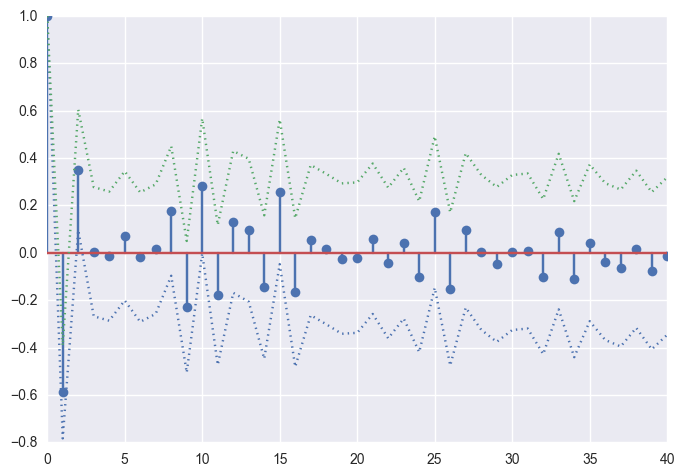

In [8]:
plt.stem(acf)
plt.hold(True)
plt.plot(confint[:, 0], ":")
plt.plot(confint[:, 1], ":")
plt.show()

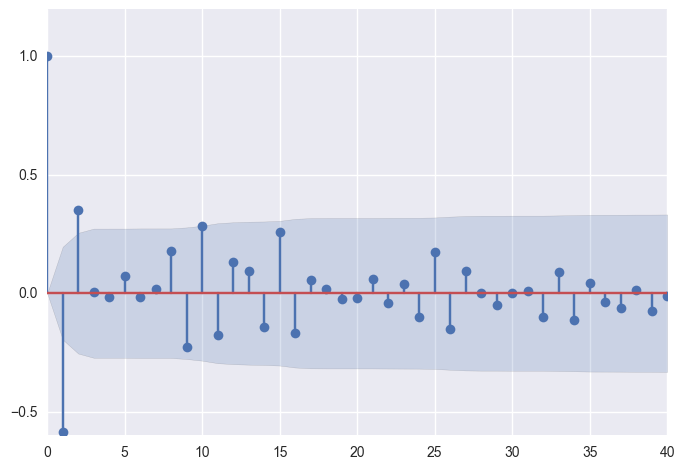

In [13]:
plt.stem(acf)
plt.hold(True)
c = 0.5 * (confint[:, 1] - confint[:, 0])
plt.fill_between(np.arange(len(acf)), -c, c, alpha=0.2)
plt.show()
## 2차 MA로 사용가능함 
## 그러나 5차에서는 사용불가능 
## 부분분 MA로 사용할수 있음 

`statsmodels.graphics.tsa.plot_acf` 명령은 샘플 자기상관계수 함수와 표준 오차의 크기를 동시에 그려준다.

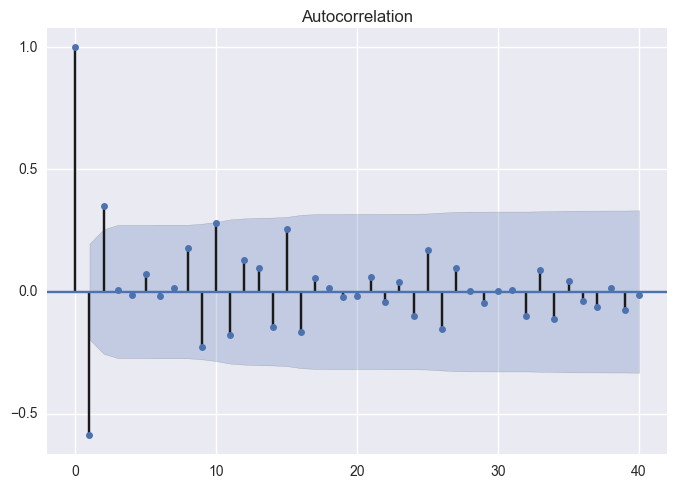

In [4]:
sm.graphics.tsa.plot_acf(y, lags=40)
plt.show()